# Econometric analysis

This notebook contains an econometric analysis using the [Wooldridge dataset](https://cran.r-project.org/web/packages/wooldridge/wooldridge.pdf) containing 111 datasets from the book Introductory Econometrics: A Modern Approach (7th ed, J.M. Wooldridge).


In [1]:
import wooldridge
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
df = wooldridge.data('wage1')
df.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


### Multiple regression

Let's determine the wage rate for people as a function of gender, education, experience and tenure.

In [3]:
results = smf.ols('wage ~ female + educ + exper + tenure', data=df).fit()

In [4]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     74.40
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           7.30e-50
Time:                        19:25:26   Log-Likelihood:                -1314.2
No. Observations:                 526   AIC:                             2638.
Df Residuals:                     521   BIC:                             2660.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5679      0.725     -2.164      0.031      -2.991      -0.145
female        -1.8109      0.265     -6.838      0.000      -2.331      -1.291
educ           0.5715      0.049     11.584      0.000       0.475       0.668
exper          0.0254      0.012      2.195      0.029       0.003       0.048
tenure         0.1410      0.021      6.663      0.000       0.099       0.183
==============================================================================
Omnibus:                      185.864   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              715.580
Skew:                           1.589   Prob(JB):                    4.11e-156
Kurtosis:                       7.749   Cond. No.                         141.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

OK so we got some results. First R2 is 0.36 meaning that thearound 36% of variance in the dependent variable that is explained by the independent variable(s), decent but can be improved. The intercept coefficient is meaningless because it assumes that all other variables are zero. The coefficient -1.81 on female earns 1.81  U.S. dollar less per hour than a man on average with the same levels of education, experience and tenure. This difference is statistically significant (P<0.05) which means that either there is a gender bias in wages or there are other explanatory variables, not included in the model, that explains the difference.
The coefficient on education is 0.57 which means that each additional year of education raises hourly wages by about 0.57 U.S. dollars. 

### Elasticity in regression

In [5]:
df = wooldridge.data('hprice1')
df['log_price'] = np.log(df['price'])
df['log_lotsize'] = np.log(df['lotsize'])
df['log_sqrft'] = np.log(df['sqrft'])
df.head()

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft,log_price,log_lotsize,log_sqrft
0,300.0,349.100006,4,6126.0,2438,1,5.703783,5.855359,8.720297,7.798934,5.703782,8.720297,7.798933
1,370.0,351.500000,3,9903.0,2076,1,5.913503,5.862210,9.200593,7.638198,5.913503,9.200593,7.638198
2,191.0,217.699997,3,5200.0,1374,0,5.252274,5.383118,8.556414,7.225482,5.252273,8.556414,7.225481
3,195.0,231.800003,3,4600.0,1448,1,5.273000,5.445875,8.433811,7.277938,5.273000,8.433812,7.277939
4,373.0,319.100006,4,6095.0,2514,1,5.921578,5.765504,8.715224,7.829630,5.921578,8.715224,7.829630


In [6]:
results = smf.ols('log_price ~ log_lotsize + log_sqrft + bdrms + C(colonial)', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     38.38
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           3.74e-18
Time:                        19:25:26   Log-Likelihood:                 26.619
No. Observations:                  88   AIC:                            -43.24
Df Residuals:                      83   BIC:                            -30.85
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.3496      0.651     -2.073      0.041      -2.644      -0.055
C(colonial)[T.1]     0.0538      0.045      1.202      0.233      -0.035       0.143
log_lotsize          0.1678      0.038      4.395      0.000       0.092       0.244
log_sqrft            0.7072      0.093      7.620      0.000       0.523       0.892
bdrms                0.0268      0.029      0.934      0.353      -0.030       0.084
==============================================================================
Omnibus:                       13.728   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               50.828
Skew:                          -0.053   Prob(JB):                     9.18e-12
Kurtosis:                       6.722   Cond. No.                         411.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So in this regression we look at log houseprices to lot size, square foot, number of bedrooms and whether or not it is  a colonial style house. When the dependent variable is in log form it means that we are looking at its percentage change rather than absolute change. So to interpret when we increase the number of bedrooms by one room, the house prices on average increase by 2.68 per cent. When both the dependent and explanatory variable are expressed in log form it is an elasticity, so in terms of lot size a 1% increase in lot size is associated with a 16.8% increase in price on average, holding other variables constant.

In [7]:
df = wooldridge.data('wage1')
df.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


### Dummy variables

So let's estimate a new wage model allowing for wage differences among four different groups of peoples: married men, married women, single men, and single women. We'll create a set of dummy variables using sex and married columns with single men acting as a base group.

In [8]:
df['marrmale'] = ((df['female'] == 0) & (df['married'] == 1)).astype(int)
df['marrfem']  = ((df['female'] == 1) & (df['married'] == 1)).astype(int)
df['singfem']  = ((df['female'] == 1) & (df['married'] == 0)).astype(int)

df['log_wage'] = np.log(df['wage'])
df['exper_sq'] = df['exper'] ** 2
df['tenure_sq'] = df['tenure'] ** 2


In [9]:
results = smf.ols('log_wage ~ marrmale + marrfem + singfem + educ + exper + exper_sq + tenure + tenure_sq', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_wage   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     55.25
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           1.28e-64
Time:                        19:25:26   Log-Likelihood:                -250.96
No. Observations:                 526   AIC:                             519.9
Df Residuals:                     517   BIC:                             558.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3214      0.100      3.213      0.001       0.125       0.518
marrmale       0.2127      0.055      3.842      0.000       0.104       0.321
marrfem       -0.1983      0.058     -3.428      0.001      -0.312      -0.085
singfem       -0.1104      0.056     -1.980      0.048      -0.220      -0.001
educ           0.0789      0.007     11.787      0.000       0.066       0.092
exper          0.0268      0.005      5.112      0.000       0.017       0.037
exper_sq      -0.0005      0.000     -4.847      0.000      -0.001      -0.000
tenure         0.0291      0.007      4.302      0.000       0.016       0.042
tenure_sq     -0.0005      0.000     -2.306      0.022      -0.001   -7.89e-05
==============================================================================
Omnibus:                       15.526   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.182
Skew:                          -0.062   Prob(JB):                     1.03e-07
Kurtosis:                       4.205   Cond. No.                     4.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In the above regression, we regress log on the groups with education, experience and tenure. To interpret the coefficients among the groups, we have to compare it to the base group single men. The estimates are there the proportionate difference in wage compared to single males. The group married males earn about 21.3% more than single men, holding education, experience and tenure fixed whereas married women earn 19.8% less than single men all else equal. By extension, single women earn about 8.8% more than married women by comparing directly their coefficient estimates (-0.11 and -0.198).

### Interaction term

We can recast the previous regression using an interaction term to model a situation where the effect of one variable depends on the level of another variable, capturing non-additive relationship between two explanatory variables. 

In [10]:
results = smf.ols('log_wage ~ educ + exper + exper_sq + tenure + tenure_sq + female * married', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_wage   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     55.25
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           1.28e-64
Time:                        19:25:26   Log-Likelihood:                -250.96
No. Observations:                 526   AIC:                             519.9
Df Residuals:                     517   BIC:                             558.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3214      0.100      3.213      0.001       0.125       0.518
educ               0.0789      0.007     11.787      0.000       0.066       0.092
exper              0.0268      0.005      5.112      0.000       0.017       0.037
exper_sq          -0.0005      0.000     -4.847      0.000      -0.001      -0.000
tenure             0.0291      0.007      4.302      0.000       0.016       0.042
tenure_sq         -0.0005      0.000     -2.306      0.022      -0.001   -7.89e-05
female            -0.1104      0.056     -1.980      0.048      -0.220      -0.001
married            0.2127      0.055      3.842      0.000       0.104       0.321
female:married    -0.3006      0.072     -4.188      0.000      -0.442      -0.160
==============================================================================
Omnibus:                       15.526   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.182
Skew:                          -0.062   Prob(JB):                     1.03e-07
Kurtosis:                       4.205   Cond. No.                     5.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In the above regression, instead of creating multiple dummy variables we are creating an interaction between female and married. So the female:married term checks if the effect of being female differs depending on marital status, if the coefficient is zero women earn the same regardless of marital status. So married and female can be thought of having different intercepts whereas the interaction term checks for a difference in gender gap by marital status. In the above results, married women earn 0.3 US dollars per hour less than expected based on being female and married alone.



In [11]:
results = smf.ols('log_wage ~ female + educ + female * educ + exper + exper_sq + tenure + tenure_sq', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_wage   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     58.37
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           1.67e-61
Time:                        19:25:27   Log-Likelihood:                -260.49
No. Observations:                 526   AIC:                             537.0
Df Residuals:                     518   BIC:                             571.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3888      0.119      3.276      0.001       0.156       0.622
female         -0.2268      0.168     -1.354      0.176      -0.556       0.102
educ            0.0824      0.008      9.725      0.000       0.066       0.099
female:educ    -0.0056      0.013     -0.426      0.670      -0.031       0.020
exper           0.0293      0.005      5.886      0.000       0.020       0.039
exper_sq       -0.0006      0.000     -5.398      0.000      -0.001      -0.000
tenure          0.0319      0.007      4.647      0.000       0.018       0.045
tenure_sq      -0.0006      0.000     -2.509      0.012      -0.001      -0.000
==============================================================================
Omnibus:                       13.302   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               24.887
Skew:                          -0.080   Prob(JB):                     3.94e-06
Kurtosis:                       4.053   Cond. No.                     8.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In the above regression we create an interaction between female and education. When female category is zero, each additional year of education increases male wages by 8.24%. For females, there is first a base effect in that they earn on average 22.68% less than men when education is zero but then each year of education raises female wages by 8.24% - 0.56% i.e. 7.68%, because the interaction term acts as a drag. Women get 0.56 percentage points less wage increase per year of education compared to men, suggesting a narrower return to education for women. Instead of the variable adding or substracting an intercept, the interaction term now acts as a slope parameter. 

### Linear probability model

In [12]:
df = wooldridge.data('mroz')
df.head()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,16310.0,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800.0,0.6615,7,7,11.0,1,5,19.499981,0.328512,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040.0,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300.0,0.7815,7,7,5.0,0,6,6.799996,0.092123,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300.0,0.6215,12,14,9.5,1,7,20.100058,1.524272,49


In [13]:
df['exper_sq'] = df['exper'] ** 2

In [14]:
results = smf.ols('inlf ~ nwifeinc + educ + exper + exper_sq + age + kidslt6 + kidsge6', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   inlf   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     38.22
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           6.90e-46
Time:                        19:25:27   Log-Likelihood:                -423.89
No. Observations:                 753   AIC:                             863.8
Df Residuals:                     745   BIC:                             900.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5855      0.154      3.798      0.000       0.283       0.888
nwifeinc      -0.0034      0.001     -2.351      0.019      -0.006      -0.001
educ           0.0380      0.007      5.151      0.000       0.024       0.052
exper          0.0395      0.006      6.962      0.000       0.028       0.051
exper_sq      -0.0006      0.000     -3.227      0.001      -0.001      -0.000
age           -0.0161      0.002     -6.476      0.000      -0.021      -0.011
kidslt6       -0.2618      0.034     -7.814      0.000      -0.328      -0.196
kidsge6        0.0130      0.013      0.986      0.324      -0.013       0.039
==============================================================================
Omnibus:                      169.137   Durbin-Watson:                   0.494
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.741
Skew:                          -0.196   Prob(JB):                     1.05e-08
Kurtosis:                       1.991   Cond. No.                     3.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In this case, the dependent variable is binary, taking values of 0 or 1. So a change in the independent variable is interpreted as changing
the probability that inlf equals 1. For instance, experience is 0.0395, so one additional year of experience increases the probability of labor force participation by 0.038 or 3.8%, all else equal. Experience is also entered as a squared variable, to check for diminishing effects of labor force participation probability. So in actuality, experience has a 0.039 - 2 * -0.0006 probability when experience increases by one year. Whereas having kids less than or equal to 6 has a coefficient of -0.26, having kids greater than 6 has a coefficient of 0.013, meaning that having young kids has a much greater impact on the probability of labor force participation than does having older kids. 

### OLS assumptions

There are several assumptions made in regressions. We will view and test some of the most common here.

#### Linearity

Assumption: The relationship between the dependent variable Y and the independent variables Xi is linear. A violation of this assumption suggests that the model is unspecified and can yield biased estimates and poor predictions.
We can test linearity by fitting the model and plotting the fitted values versus residuals, which should show a random noise pattern.

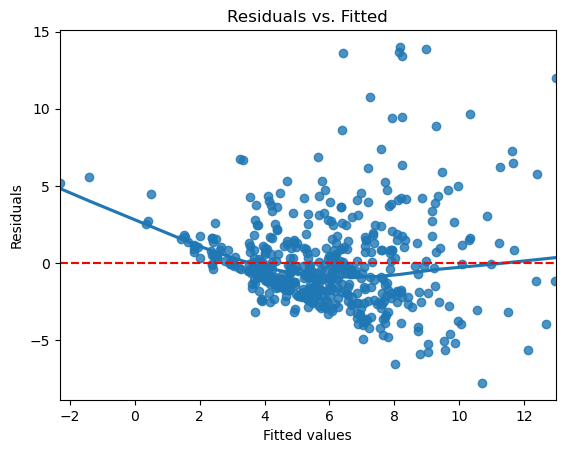

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
df = wooldridge.data('wage1')
model = smf.ols('wage ~ female + educ + exper + tenure', data=df).fit()

# Plot residuals vs. fitted values
fitted_vals = model.fittedvalues
residuals = model.resid
sns.residplot(x=fitted_vals, y=residuals, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted")
plt.axhline(0, color='red', linestyle='--')
plt.show()


Above we see a tendency where the residuals increase with fitted values, indicating heteroscedasticity in the model fit. Let's test it with a Breusch Pagan test.

In [16]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Get residuals and exogenous variables
resid = model.resid
exog = model.model.exog

bp_test = het_breuschpagan(resid, exog)
p_value = bp_test[1]
print(f'P-value of heteroscedastic test is {p_value: .8f}. A value below 0.05 indicates heteroscedasticity')

P-value of heteroscedastic test is  0.00000001. A value below 0.05 indicates heteroscedasticity


OK so the model fit is heteroscedastic. There are two solutions for this, either we can use a robust model with robust standard errors that preserves the coefficients but makes t-stats more reliable. Alternatively we can use a log form on the dependent variable which makes the residual pattern more random.

Alternative 1: Robust standard errors

In [17]:
robust_model = smf.ols('wage ~ female + educ + exper + tenure', data=df).fit(cov_type='HC1')
print(robust_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     44.57
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           3.41e-32
Time:                        19:25:30   Log-Likelihood:                -1314.2
No. Observations:                 526   AIC:                             2638.
Df Residuals:                     521   BIC:                             2660.
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5679      0.826     -1.898      0.0

Alternative 2: log dependent variable

In [18]:
import numpy as np
df['lwage'] = np.log(df['wage'])

log_model = smf.ols('lwage ~ female + educ + exper + tenure', data=df).fit()
print(log_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     84.07
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           4.68e-55
Time:                        19:25:30   Log-Likelihood:                -282.46
No. Observations:                 526   AIC:                             574.9
Df Residuals:                     521   BIC:                             596.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5013      0.102      4.920      0.0

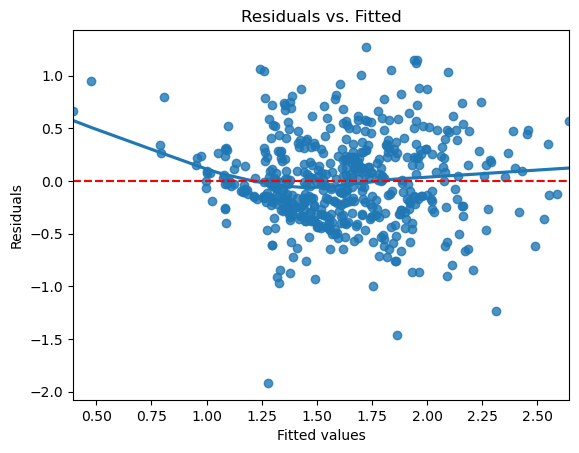

In [19]:
fitted_vals = log_model.fittedvalues
residuals = log_model.resid
sns.residplot(x=fitted_vals, y=residuals, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted")
plt.axhline(0, color='red', linestyle='--')
plt.show()

#### No multicollinearity

Assumption: There is no multicollinearity between explanatory variables, i.e. none of the independent variables is a perfect linear combination of the others. This ensures that the regression coefficients are uniquely estimable. If one predictor is an exact linear combination of others (e.g., X3 = X1 + X2), OLS will fail. When predictors are highly correlated, the variance of the coefficient estimates increases.

A violation of this assumption can lead to coefficients becoming very sensitive to small changes in the data and signs of coefficients may flip unexpectedly. Standard errors are typically large, thus p-values rise and can show that important variables appear insignificant, even when they are not. Lastly, when two variables overlap heavily, it's hard to isolate the effect of one while holding the other constant.

 

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = model.model.exog
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["Variable"] = model.model.exog_names
print(vif)

         VIF   Variable
0  31.568444  Intercept
1   1.052479     female
2   1.120192       educ
3   1.479827      exper
4   1.402814     tenure


OK here we're using the variance inflation factor which measures quantifies how much the variance of an estimated regression coefficient is inflated due to multicollinearity. A VIF of around 1 indicates there is no multicollinearity, whereas between 1-5 indicating moderate multicollinearity. So it appears this assumption is not violated in this dataset.

#### Normality of errors

The distribution of the differences between the observed values and the values predicted by the model should resemble a bell curve. If the error terms are not normally distributed, the standard errors of the OLS estimators might not be reliable. This can lead to inaccurate confidence intervals, making it difficult to assess the statistical significance of the model's coefficients.

We can test this with a Q-Q plot that shows the residuals which should follow a 45 degree line.

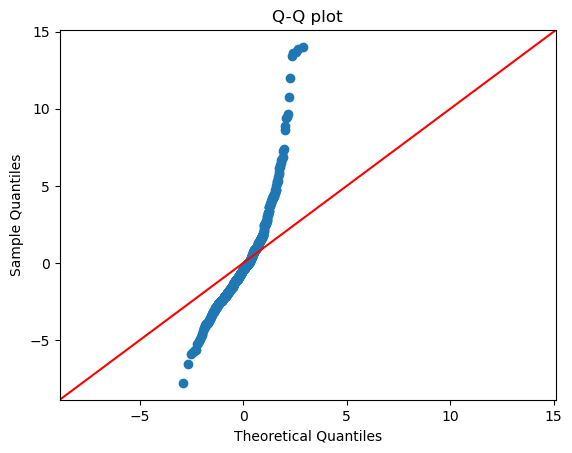

Shapiro-Wilk Test: Stat=0.891, p=0.000


In [21]:
from scipy.stats import shapiro
import statsmodels.api as sm

# Q-Q Plot
sm.qqplot(model.resid, line='45')
plt.title("Q-Q plot")
plt.show()

# Shapiro-Wilk Test
stat, p = shapiro(model.resid)
print('Shapiro-Wilk Test: Stat=%.3f, p=%.3f' % (stat, p))


OK so the residuals are clearly far off the red line, strongly indicating non-normality. Also the Shapiro-Wilk test has p less than 0.05 confirming this. Let's further corroborate by plotting a histogram of residuals. It clearly shows a fat tail with a skew towards positive residuals.

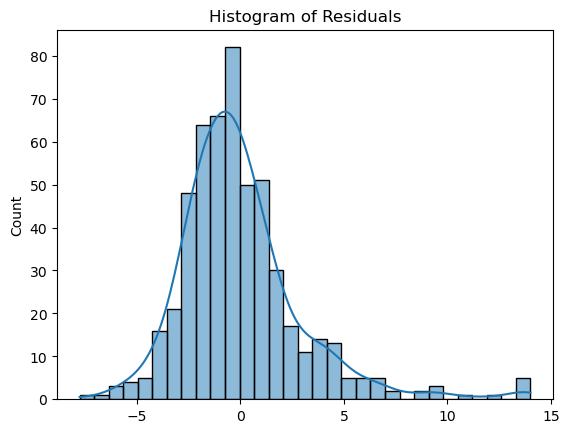

In [22]:
sns.histplot(model.resid, kde=True)
plt.title("Histogram of Residuals")
plt.show()

So this assumption violation relates to the linearity assumption being violated. This can be addressed as before by log transforming the dependent variable which should normalize errors.

## Time series regressions

So far we have looked at cross-sectional regressions. Time series regressions is another area of regression analysis where there is a time component. Time series regression is a statistical method used to analyze and predict the relationship between variables where data is collected over time. It involves using regression models to understand how past values of a variable (or related variables) influence its current and future values.

In [23]:
df = wooldridge.data('intdef')
df = df.rename(columns={'i3': 'int3'})
df.head()

,year,int3,inf,rec,out,def,i3_1,inf_1,def_1,ci3,cinf,cdef,y77
0,1948,1.04,8.1,16.200001,11.6,-4.600000,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1949,1.10,-1.2,14.500000,14.3,-0.200000,1.04,8.1,-4.600000,0.06,-9.3,4.400001,0
2,1950,1.22,1.3,14.400000,15.6,1.200001,1.10,-1.2,-0.200000,0.12,2.5,1.400001,0
3,1951,1.55,7.9,16.100000,14.2,-1.900001,1.22,1.3,1.200001,0.33,6.6,-3.100001,0
4,1952,1.77,1.9,19.000000,19.4,0.400000,1.55,7.9,-1.900001,0.22,-6.0,2.300000,0


In [24]:
import statsmodels.api as sm

X = df[['inf', 'def']]
y = df['int3']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   int3   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     40.09
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           2.48e-11
Time:                        19:25:32   Log-Likelihood:                -112.16
No. Observations:                  56   AIC:                             230.3
Df Residuals:                      53   BIC:                             236.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7333      0.432      4.012      0.0

In the above regression, we have the three month t-bill rate as dependent variable and as explanatory variables inflation and federal budget deficit. An increase of inflation or the deficit indicates that the t-bill rate rises. A percentage point increase in the inflation rate increases the t-bill rate by 0.606 points. 

We can also estimate distributed lag models, where lagged explanatory variables may have an effect on the current dependent variable.

In [25]:
df = wooldridge.data('consump')
df.head()

,year,i3,inf,rdisp,rnondc,rserv,pop,y,rcons,c,...,gy,gc_1,gy_1,r3_1,lc_ly,lc_ly_1,gc_2,gy_2,r3_2,lc_ly_2
0,1959,3.41,0.7,1530.099976,606.299988,687.400024,177830.0,8604.285156,1293.699951,7274.925293,...,NaN,NaN,NaN,NaN,-0.167827,NaN,NaN,NaN,NaN,NaN
1,1960,2.93,1.7,1565.400024,615.400024,717.400024,180671.0,8664.368164,1332.800049,7376.945312,...,0.006959,NaN,NaN,2.71,-0.160860,-0.167827,NaN,NaN,NaN,NaN
2,1961,2.38,1.0,1615.800049,626.700012,746.500000,183691.0,8796.293945,1373.199951,7475.597168,...,0.015111,0.013926,0.006959,1.23,-0.162686,-0.160860,NaN,NaN,2.71,-0.167827
3,1962,2.78,1.0,1693.699951,646.500000,783.400024,186538.0,9079.651367,1429.900024,7665.462402,...,0.031706,0.013285,0.015111,1.38,-0.169312,-0.162686,0.013926,0.006959,1.23,-0.160860
4,1963,3.16,1.3,1755.500000,660.000000,818.700012,189242.0,9276.482422,1478.699951,7813.804199,...,0.021446,0.025081,0.031706,1.78,-0.171591,-0.169312,0.013285,0.015111,1.38,-0.162686


In [26]:
df['rnondc_diff'] = df['rnondc'].diff()
df['y_diff'] = df['y'].diff()
df['c_diff'] = df['c'].diff()
df['rdisp_diff'] = df['rdisp'].diff()


In [29]:
df['c_diff_lag'] = df['c_diff'].shift()
df = df.dropna()

In [30]:
X = df[['c_diff_lag', 'inf']]
y = df['y_diff']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 y_diff   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     4.948
Date:                Fri, 27 Jun 2025   Prob (F-statistic):             0.0136
Time:                        19:26:18   Log-Likelihood:                -229.88
No. Observations:                  34   AIC:                             465.8
Df Residuals:                      31   BIC:                             470.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        304.4837     96.687      3.149      0.0

In the above regression we model the change in per capita real disposable income in time t from the contemporaneous inflation rate and per capita real consumption lagged by one time period. It shows that an increase in per capital real consumption at time t-1 indicates an increase in per capita real disposable income at time t, probably owing to some wealth effect that a rational actor anticipating higher real disposable income in the future will increase consumption today.

The reason we differentiate the variables above is because they have a time trend. Another way to handle it is to model the trend explicitly, let's try it on house prices.

In [31]:
df = wooldridge.data('hseinv')
df.head()

,year,inv,pop,price,linv,lpop,lprice,t,invpc,linvpc,lprice_1,linvpc_1,gprice,ginvpc
0,1947,54864.0,144126.0,0.8190,10.912613,11.878443,-0.199671,1,0.380667,-0.965831,NaN,NaN,NaN,NaN
1,1948,64717.0,146631.0,0.8649,11.077779,11.895675,-0.145141,2,0.441360,-0.817895,-0.199671,-0.965831,0.054530,0.147935
2,1949,63150.0,149188.0,0.8456,11.053268,11.912963,-0.167709,3,0.423291,-0.859694,-0.145141,-0.817895,-0.022567,-0.041799
3,1950,86014.0,151684.0,0.8765,11.362266,11.929555,-0.131819,4,0.567060,-0.567289,-0.167709,-0.859694,0.035890,0.292405
4,1951,70610.0,154287.0,0.8819,11.164927,11.946569,-0.125677,5,0.457654,-0.781643,-0.131819,-0.567289,0.006142,-0.214353


In [32]:
X = df[['lprice']]
y = df['linvpc']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 linvpc   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     10.53
Date:                Fri, 27 Jun 2025   Prob (F-statistic):            0.00238
Time:                        19:26:20   Log-Likelihood:                 19.617
No. Observations:                  42   AIC:                            -35.23
Df Residuals:                      40   BIC:                            -31.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5502      0.043    -12.788      0.0

$$
\text{linvpc}_t = \beta_0 + \beta_1 \cdot \text{lprice}_t + \varepsilon_t
$$

Above we model log real per capital housing investment on the log house price index. The coefficient 1.241 shows the elasticity of house prices on housing investment where a 1% increase in house price is associated with a 1% increase in house investment. But let's look at the series side by side.

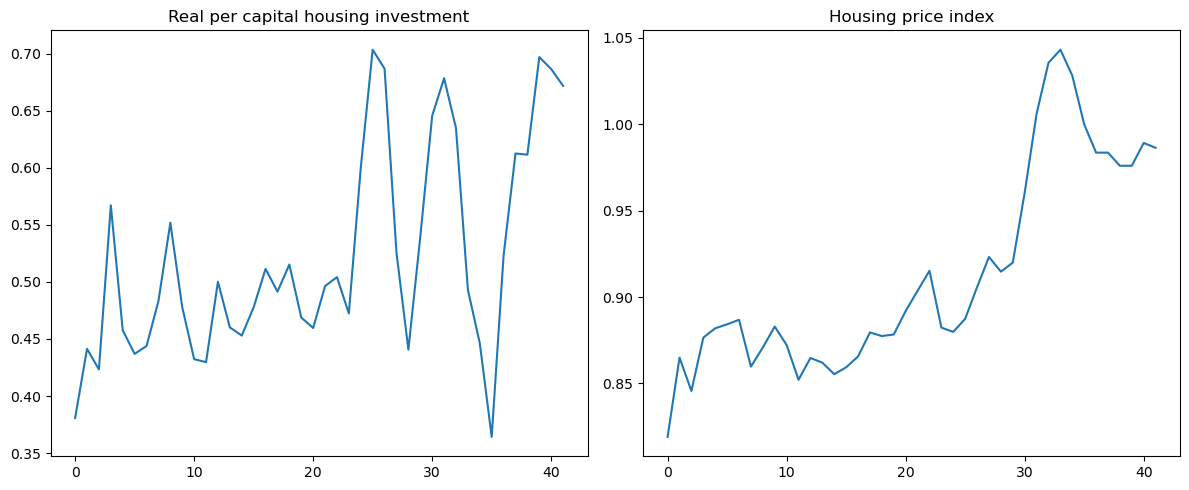

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot y1
axes[0].plot(df.invpc)
axes[0].set_title('Real per capital housing investment')

# Plot y2
axes[1].plot(df.price)
axes[1].set_title('Housing price index')

plt.tight_layout()
plt.show()


So the series are trending upwards which can skew our model results in the regression. Instead let's incorporate a time variable as explanatory variable.

$$
\text{linvpc}_t = \beta_0 + \beta_1 \cdot \text{lprice}_t + \beta_2 \cdot \text{trend}_t + \varepsilon_t
$$

In [34]:
df['trend'] = range(len(df))

X = df[['lprice', 'trend']]
y = df['linvpc']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 linvpc   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     10.08
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           0.000296
Time:                        19:26:21   Log-Likelihood:                 23.459
No. Observations:                  42   AIC:                            -40.92
Df Residuals:                      39   BIC:                            -35.71
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9032      0.132     -6.829      0.0

OK so this changed the model coefficients. Now the estimated price elasticity has turned negative and is not statistically significant from zero (p=0.578). The time trend on the other hand is statistically significant (p=0.008), showing that around 1% increase in housing investment per year on average. Thus, there is a spurious relation between price and investment and the fact that the trend is significant may mask other important variables that determine investment.

### Time series assumptions

Let's test some of the time series regression assumptions. Time series regression models rely on several key assumptions to ensure the validity of statistical inferences and predictions. These assumptions are crucial for interpreting the model's results and making reliable forecasts.

#### Autocorrelation of Residuals

The errors (residuals) should be uncorrelated with each other. This assumption implies that the error for one observation does not influence the error for another observation, especially important in time series data where autocorrelation can be an issue.

In [35]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_ljungbox

# Durbin-Watson
dw_stat = durbin_watson(model.resid)
print(f"Durbin-Watson statistic: {dw_stat:.3f}")

# Ljung-Box test
ljung_box = acorr_ljungbox(model.resid, lags=[10], return_df=True)
print(ljung_box)

Durbin-Watson statistic: 1.049
      lb_stat  lb_pvalue
10  27.847334    0.00191


The Durbin Watson statistic of 1.049 is well below 2 indicating positive autocorrelation of the residuals, which is supported by the Ljung Box p-value of 0.00191 (less than 0.05) which means we reject the null hypothesis of no autocorrelation up to lag 10. Knowing this, we can use Newey West robust standard errors.

In [36]:
model_hac = model.get_robustcov_results(cov_type='HAC', maxlags=10)
print(model_hac.summary())

                            OLS Regression Results                            
Dep. Variable:                 linvpc   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     17.15
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           4.54e-06
Time:                        19:26:22   Log-Likelihood:                 23.459
No. Observations:                  42   AIC:                            -40.92
Df Residuals:                      39   BIC:                            -35.71
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9032      0.127     -7.103      0.0

#### Normality of residuals
Normality of residuals is crucial for calculating reliable standard errors for model parameters, which are used to construct confidence intervals and conduct hypothesis tests. When residuals are normally distributed, it ensures the validity of statistical inferences drawn from the regression model.


In [37]:
from scipy.stats import jarque_bera, shapiro

print("Jarque-Bera test:", jarque_bera(model.resid))
print("Shapiro-Wilk test:", shapiro(model.resid))


Jarque-Bera test: SignificanceResult(statistic=3.9783207161028447, pvalue=0.13681024885743737)
Shapiro-Wilk test: ShapiroResult(statistic=0.9566134023260102, pvalue=0.111622063599359)


The Jarque-Bera and Shapiro-Wilk tests assume normality of residuals and with p-values above .005 we fail to reject the null hypothesis, indicating that the residuals are normally distributed. We can plot them visually as well.

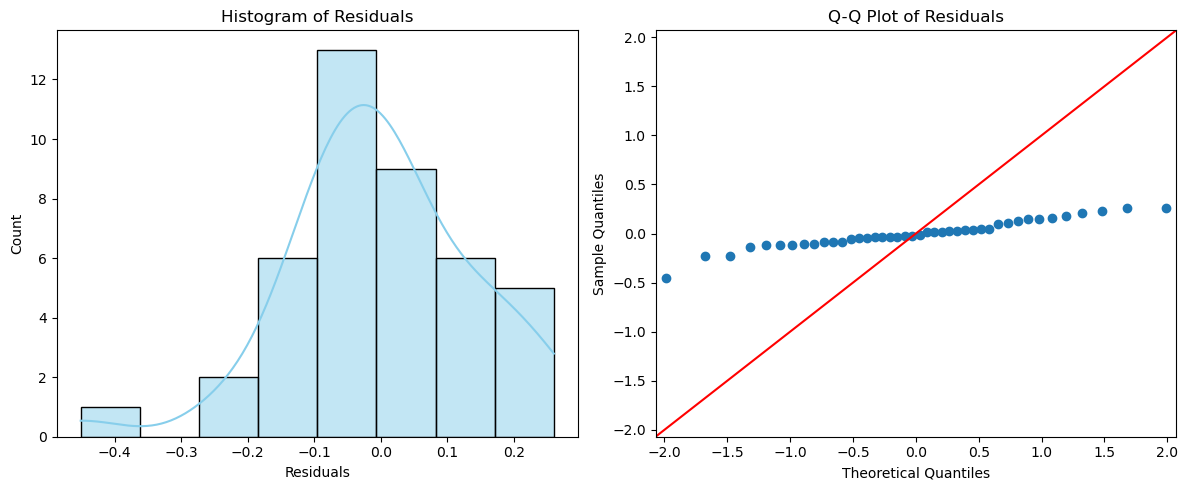

In [38]:
residuals = model.resid

# Set up plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram + KDE
sns.histplot(residuals, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Histogram of Residuals')
axes[0].set_xlabel('Residuals')

# Q-Q plot
sm.qqplot(residuals, line='45', ax=axes[1])
axes[1].set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()


OK so the histogram shows no significant skew in residuals and the q-q plot is fairly linear, both indicating normality in residuals. The fact that the scatter plot has a lower slope than the theoretical normality in red to the right indicates that the model residuals have a smaller standard deviation than a standard normal distribution.

#### Stationarity of residuals
Stationarity implies that the statistical properties of the residuals, such as the mean and variance, remain constant over time. This assumption is vital for ensuring that the model is well-specified and that its results are reliable and not spurious.

In [39]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(model.resid)
print(f"ADF Statistic: {adf_test[0]:.3f}")
print(f"p-value: {adf_test[1]:.3f}")

ADF Statistic: -4.700
p-value: 0.000


In the Augmented Dickey-Fuller (ADF) test, a p-value less than 0.05 indicates that the null hypothesis of a unit root (non-stationarity) can be rejected, suggesting the time series is stationary. Let's check how the residuals move over time.

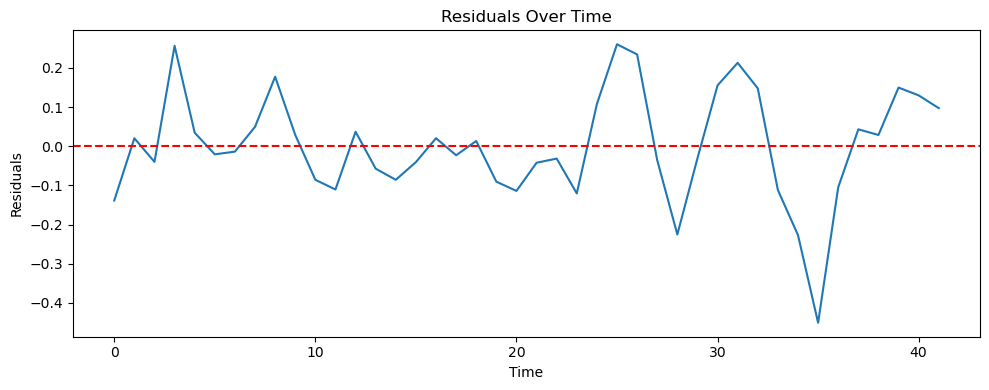

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(model.resid)
plt.title('Residuals Over Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.tight_layout()
plt.show()

OK so the residuals appear to oscillate around 0 over time with no apparent trend, which is a good sign for model validity. But let's check the autocorrelation of residuals.

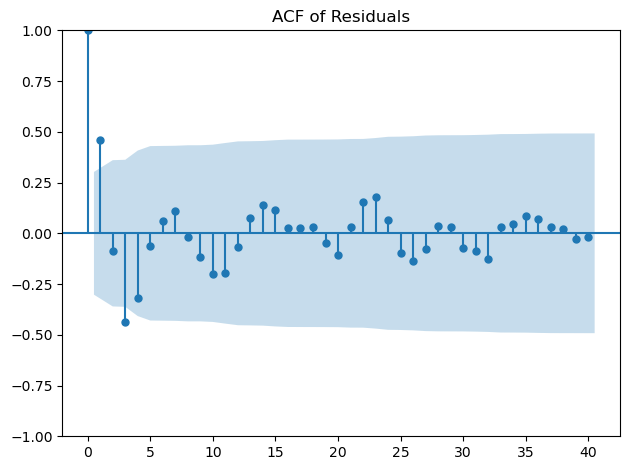

In [41]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(model.resid, lags=40)
plt.title('ACF of Residuals')
plt.tight_layout()
plt.show()

So in the ACF plot we see that residuals with lag 1 is significant. A time series can be stationary (mean and variance constant over time) but still autocorrelated. So in this case, residuals don't trend, but they do influence each other across time (especially at lag 1). Significant lag-1 autocorrelation suggests a dynamic structure (e.g., a time delay or omitted lagged variable). Even though coefficient estimates should be robust this can be incorrect with invalid p-values and confidence intervals as a result. 

## Panel regression

Above we have tried out cross-sectional and time series regressions. But often econometrics handle panel data sets which require additional tools. In this chapter we will model panel regressions which mix cross-sectional and time series features. For instance we might test the relationships between firm investments and profitability across firms and across time.

Let's start by using a pooled OLS model on airfare data. As can be seen below there are four years and 1149 routes, with 4596 total observations.

In [55]:
df = pd.read_csv('http://people.stern.nyu.edu/wgreene/Econometrics/cornwell&rupert.csv')
pd.set_option('display.max_columns', None)
df.head()

,EXP,WKS,OCC,IND,SOUTH,SMSA,MS,FEM,UNION,ED,BLK,LWAGE,EXPSQ,YEAR,LOGWKS,ID,EXPB,WKSB,OCCB,INDB,SOUTHB,SMSAB,UNIONB,EXPSQB
0,3,32,0,0,1,0,1,0,0,9,0,5.56068,9,1,3.465736,1,6,37.571429,0.0,0.428571,1.0,0.0,0.0,40
1,4,43,0,0,1,0,1,0,0,9,0,5.72031,16,2,3.761200,1,6,37.571429,0.0,0.428571,1.0,0.0,0.0,40
2,5,40,0,0,1,0,1,0,0,9,0,5.99645,25,3,3.688880,1,6,37.571429,0.0,0.428571,1.0,0.0,0.0,40
3,6,39,0,0,1,0,1,0,0,9,0,5.99645,36,4,3.663562,1,6,37.571429,0.0,0.428571,1.0,0.0,0.0,40
4,7,42,0,1,1,0,1,0,0,9,0,6.06146,49,5,3.737670,1,6,37.571429,0.0,0.428571,1.0,0.0,0.0,40


| Variable | Description                                     |
|----------|-------------------------------------------------|
| EXP      | Work experience                                 |
| WKS      | Weeks worked                                    |
| OCC      | Occupation (1 if blue collar)                   |
| IND      | 1 if in manufacturing industry                  |
| SOUTH    | 1 if resides in the South                       |
| SMSA     | 1 if resides in a city (SMSA)                   |
| MS       | 1 if married                                     |
| FEM      | 1 if female                                     |
| UNION    | 1 if wage is set by a union contract            |
| ED       | Years of education                              |
| LWAGE    | Log of wage (dependent variable in regressions) |

In [56]:
df = df.set_index(['IND', 'YEAR'])

import statsmodels.api as sm
from linearmodels.panel import PooledOLS

y = df['LWAGE']
X = df[['EXP', 'OCC', 'SMSA', 'MS', 'FEM', 'UNION', 'ED']]
X = sm.add_constant(X)

model = PooledOLS(y, X).fit()
print(model.summary)

                          PooledOLS Estimation Summary                          
Dep. Variable:                  LWAGE   R-squared:                        0.3822
Estimator:                  PooledOLS   R-squared (Between):             -0.7983
No. Observations:                4165   R-squared (Within):               0.3845
Date:                Fri, Jun 27 2025   R-squared (Overall):              0.3822
Time:                        19:34:56   Log-likelihood                   -1686.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      367.33
Entities:                           2   P-value                           0.0000
Avg Obs:                       2082.5   Distribution:                  F(7,4157)
Min Obs:                       1647.0                                           
Max Obs:                       2518.0   F-statistic (robust):             367.33
                            

So the pooled OLS above show that all coefficients are statistically significant at the 1% level (p-value < 0.01), suggesting strong evidence of relationships. For example each additional year of experience is associated with a 1.06% increase in wages, holding other factors constant and blue-collar workers earn 14.85% less than others, on average. Overall, the model points to a good model fit with a reasonable R-squared of 0.3854 for cross-sectional wage data. 

However, pooled OLS has key limitations for panel data. Pooled OLS assumes all individuals are identical aside from observed variables, ignoring unobserved individual-specific traits like ability or motivation, which can bias results. It also treats repeated observations on the same individuals as independent, violating assumptions about error structure in panel data. Additionally, it does not account for time effects, potentially omitting important trends or shocks that influence wages.


In the plot below I visualize the shortcomings of pooled OLS v fixed effects model. The scatter points reflect observations for each individual in a fictitious data set. The pooled OLS line (black dashed) has a single slope and intercept, thus it ignores that individuals start at different baseline levels → biased slope. The fixed effects lines (colored) on the other hand have the same slope but individual intercepts, capturing unobserved heterogeneity → better fit to each person’s trend.

Pooled OLS coefficient for X: 1.628
Fixed Effects coefficient for X: 1.628


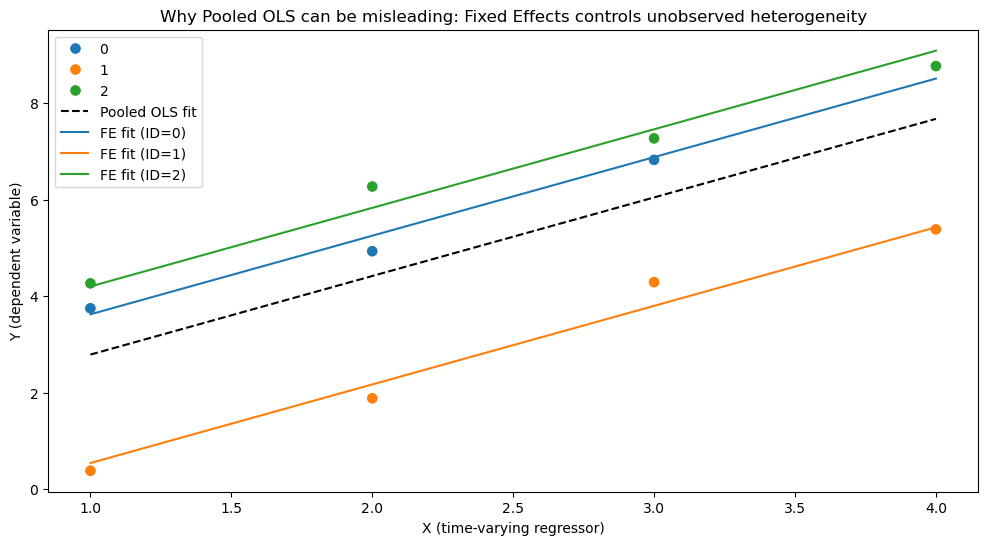

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from linearmodels.panel import PanelOLS

# Set seed for reproducibility
np.random.seed(42)

# Create fictitious panel data for 3 individuals, 4 time periods each
n_individuals = 3
n_periods = 4
N = n_individuals * n_periods

# Individual fixed effects (unobserved)
alpha = np.array([2, -1, 3])  # Different baseline for each individual

# Time-varying regressor X
X = np.tile(np.arange(1, n_periods + 1), n_individuals)

# Generate dependent variable Y with true beta = 1.5 plus individual effect and noise
Y = np.repeat(alpha, n_periods) + 1.5 * X + np.random.normal(0, 0.5, N)

# Create DataFrame
df = pd.DataFrame({
    'ID': np.repeat(np.arange(n_individuals), n_periods),
    'Time': np.tile(np.arange(n_periods), n_individuals),
    'X': X,
    'Y': Y
})
df = df.set_index(['ID', 'Time'])

# Pooled OLS regression ignoring individual effects
import statsmodels.api as sm
pooled_model = sm.OLS(df['Y'], sm.add_constant(df['X'])).fit()

# Fixed Effects regression controlling for individual effects
fe_model = PanelOLS(df['Y'], sm.add_constant(df['X']), entity_effects=True).fit()

print(f"Pooled OLS coefficient for X: {pooled_model.params['X']:.3f}")
print(f"Fixed Effects coefficient for X: {fe_model.params['X']:.3f}")

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot by individual with different colors
sns.scatterplot(data=df.reset_index(), x='X', y='Y', hue='ID', palette='tab10', s=70)

# Pooled OLS fit line (single slope)
x_vals = np.linspace(df['X'].min(), df['X'].max(), 100)
y_pooled = pooled_model.params['const'] + pooled_model.params['X'] * x_vals
plt.plot(x_vals, y_pooled, color='black', linestyle='--', label='Pooled OLS fit')

# Fixed Effects fits (different intercepts per individual, same slope)
for i in range(n_individuals):
    df_i = df.loc[i]
    # Calculate individual intercept as mean Y - beta*mean X (FE removes intercept but for plotting we reconstruct it)
    intercept_i = df_i['Y'].mean() - fe_model.params['X'] * df_i['X'].mean()
    y_fe = intercept_i + fe_model.params['X'] * x_vals
    plt.plot(x_vals, y_fe, label=f'FE fit (ID={i})')

plt.title("Why Pooled OLS can be misleading: Fixed Effects controls unobserved heterogeneity")
plt.xlabel("X (time-varying regressor)")
plt.ylabel("Y (dependent variable)")
plt.legend()
plt.show()

In [58]:
from linearmodels.panel import PanelOLS
exog_vars = ['EXP', 'WKS', 'OCC', 'SMSA', 'MS', 'FEM', 'UNION', 'ED']
exog = sm.add_constant(df[exog_vars])

# Fit fixed effects model
model_fe = PanelOLS(df['LWAGE'], df[exog_vars], entity_effects=True)
results_fe = model_fe.fit()
print(results_fe.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:                  LWAGE   R-squared:                        0.3879
Estimator:                   PanelOLS   R-squared (Between):              0.3486
No. Observations:                4165   R-squared (Within):               0.3879
Date:                Fri, Jun 27 2025   R-squared (Overall):              0.3495
Time:                        19:39:58   Log-likelihood                   -1662.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      329.16
Entities:                           2   P-value                           0.0000
Avg Obs:                       2082.5   Distribution:                  F(8,4155)
Min Obs:                       1647.0                                           
Max Obs:                       2518.0   F-statistic (robust):             329.16
                            

Despite switching from Pooled OLS to Fixed Effects (FE), the coefficients and R² remain quite similar, indicating that individual-specific unobserved heterogeneity isn’t dramatically biasing the pooled estimates — but it still matters statistically.

A Fixed Effects model is a regression technique used in panel data which controls for all time-invariant differences between individuals—both observed and unobserved—so the estimated coefficients reflect within-individual variation only. It removes individual-specific characteristics by by demeaning each variable — subtracting the individual's average over time from each observation — so only within-person variation remains.

The fixed effects model supports the pooled OLS findings but adds robustnessand even though the overall message is similar, the statistical justification for FE (via the F-test) means its estimates are more reliable for causal inference in a panel context.





In some cases it is more appropriate to run a random effects model, such as when the slopes of the individuals vary. Let's test whether or not a random effects model is better with the Hausmann test.

In [61]:
from linearmodels.panel import RandomEffects

model_fe = PanelOLS(y, X, entity_effects=True)
results_fe = model_fe.fit()

# Random Effects
model_re = RandomEffects(y, X)
results_re = model_re.fit()

from linearmodels.panel import compare

comparison = compare({'Fixed Effects': results_fe, 'Random Effects': results_re})
print(comparison)

                    Model Comparison                    
                         Fixed Effects    Random Effects
--------------------------------------------------------
Dep. Variable                    LWAGE             LWAGE
Estimator                     PanelOLS     RandomEffects
No. Observations                  4165              4165
Cov. Est.                   Unadjusted        Unadjusted
R-squared                       0.3849            0.3822
R-Squared (Within)              0.3849            0.3845
R-Squared (Between)            -1.2615           -0.7983
R-Squared (Overall)             0.3817            0.3822
F-statistic                     371.57            367.33
P-value (F-stat)                0.0000            0.0000
=====================     ============   ===============
const                           5.6292            5.6373
                              (121.10)          (120.95)
EXP                             0.0102            0.0105
                              (

In [63]:
from scipy import stats
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    diff = b - B
    stat = np.dot(np.dot(diff.T, np.linalg.inv(v_b - v_B)), diff)
    df = b.shape[0]
    pval = stats.chi2.sf(stat, df)
    return stat, pval

stat, p = hausman(results_fe, results_re)
print(f"Hausman test statistic = {stat:.3f}, p-value = {p:.4f}")


Hausman test statistic = 29.020, p-value = 0.0003


The p-value < 0.05 means that we reject the null hypothesis that the random effects estimator is consistent. This implies that individual-specific effects are correlated with regressors (e.g., more educated people may also have unobserved traits affecting wages). Thus it is more appropriate to keep the fixed effects model and not use random effects.